In [ ]:
import numpy as np 
import pandas as pd

#!pip install plotly
from plotly.offline import iplot
from plotly import tools
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.offline as pyo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk
#nltk.download('punkt')


from sklearn import ensemble, metrics, model_selection
import os



from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score, accuracy_score
#!pip install transformers
import transformers
from transformers import BertTokenizer,AutoTokenizer, TFAutoModel,BertForSequenceClassification 
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
from transformers import AdamW

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#!pip install googletrans
from googletrans import Translator
import copy
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (2).csv
Saving translated_test.csv to translated_test (1).csv
Saving translated_train.csv to translated_train (1).csv


In [ ]:
import io
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_data =   pd.read_csv(io.BytesIO(uploaded['test.csv']))
trans_train = pd.read_csv(io.BytesIO(uploaded['translated_train.csv']))
trans_test = pd.read_csv(io.BytesIO(uploaded['translated_test.csv']))

In [ ]:
train_data.head(10)

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
5,ed7d6a1e62,"Bir çiftlikte birisinin, ağıla kapatılmış bu ö...",Çiftlikte insanlar farklı terimler kullanırlar.,tr,Turkish,0
6,5a0f4908a0,ریاست ہائے متحدہ امریکہ واپس آنے پر، ہج ایف بی...,ہیگ کی تفتیش ایف بی آئی اہلکاروں کی طرف سے کی...,ur,Urdu,0
7,fdcd1bd867,From Cockpit Country to St. Ann's Bay,From St. Ann's Bay to Cockpit Country.,en,English,2
8,7cfb3d272c,"Look, it's your skin, but you're going to be i...",The boss will fire you if he sees you slacking...,en,English,1
9,8c10229663,Через каждые сто градусов пятна краски меняют ...,Краска изменяется в соответствии с цветом.,ru,Russian,0


In [ ]:
test_data.head(10)

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian
5,aa2510d454,His family had lost a son and a daughter now.,The son and daughter had lost their father.,en,English
6,865d1c7b16,Steps are initiated to allow program board mem...,There's enough room for 35-40 positions on the...,en,English
7,a16f7ed56b,C'était probablement la première chose dont je...,C'était l'un de mes premiers souvenirs.,fr,French
8,6d9fa191e6,"agencies' operating trust, enterprise and inte...",Agencies in financial trouble are usually audi...,en,English
9,c156e8fed5,Hakuna aliyejua walipokwenda.,Mafiko yao ilikuwa ni siri,sw,Swahili


In [ ]:
trans_train.head(10)

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Little things like these make a huge differenc...,I was trying to accomplish something.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,In role playing as well Opportunities to expre...,Children can see how different ethnic groups are.,th,Thai,1
5,ed7d6a1e62,You might hear someone on a farm saying we sho...,People on the farm use different terms.,tr,Turkish,0
6,5a0f4908a0,"On his return to the United States, Hajj met a...",The Hague was investigated by FBI agents,ur,Urdu,0
7,fdcd1bd867,From Cockpit Country to St. Ann's Bay,From St. Ann's Bay to Cockpit Country.,en,English,2
8,7cfb3d272c,"Look, it's your skin, but you're going to be i...",The boss will fire you if he sees you slacking...,en,English,1
9,8c10229663,"Every hundred degrees, paint spots change colo...",The paint changes to match the color.,ru,Russian,0


In [ ]:
trans_test.head(10)

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,"The boxes will be named after Box, Casey, Rach...","There will be no memorial for Casey, one of Co...",ur,Urdu
1,cefcc82292,This is what we were advised to do.,"When they are told what to do, the administrat...",ar,Arabic
2,e98005252c,and this is largely due to the fact that mothe...,Mothers take drugs.,fr,French
3,58518c10ba,Dialogue &amp with representatives of cities a...,IMA cooperates with other organizations becaus...,zh,Chinese
4,c32b0d16df,She was still there.,"We thought that she left, however, she stayed.",ru,Russian
5,aa2510d454,His family had lost a son and a daughter now.,The son and daughter had lost their father.,en,English
6,865d1c7b16,Steps are initiated to allow program board mem...,There's enough room for 35-40 positions on the...,en,English
7,a16f7ed56b,It was probably the first thing I remembered f...,It was one of my earliest memories.,fr,French
8,6d9fa191e6,"agencies' operating trust, enterprise and inte...",Agencies in financial trouble are usually audi...,en,English
9,c156e8fed5,No one knew where they went.,Their arrival was a secret,sw,Swahili


**Exploratory Data Analysis:**

In [ ]:
a = train_data.shape

print("The shape of train the data is:",a)

The shape of train the data is: (12120, 6)


In [ ]:
b = test_data.shape
print("The shape of the test data is:",b)

The shape of the test data is: (5195, 5)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.2+ KB


**To check if any null value is present in the data:**

In [ ]:
train_data.isnull().sum()

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64

**Numeric Columns in the data:**

In [ ]:
num_cols = train_data._get_numeric_data().columns
print("The numeric columns in the train data are:",num_cols)

The numeric columns in the train data are: Index(['label'], dtype='object')


**Catogrical Columns in the data:**

In [ ]:
df_cat = train_data[train_data.columns.difference(num_cols)]
print("The catrgorical columns in the train data are:",df_cat.columns)

The catrgorical columns in the train data are: Index(['hypothesis', 'id', 'lang_abv', 'language', 'premise'], dtype='object')


**Visualization of the languages given in the data:**

In [ ]:
value = train_data.language.values
value

array(['English', 'English', 'French', ..., 'English', 'English',
       'English'], dtype=object)

In [ ]:
t = train_data['language'].unique()
print("The unique languages in the dataset are:",t)

The unique languages in the dataset are: ['English' 'French' 'Thai' 'Turkish' 'Urdu' 'Russian' 'Bulgarian' 'German'
 'Arabic' 'Chinese' 'Hindi' 'Swahili' 'Vietnamese' 'Spanish' 'Greek']


In [ ]:
tl = train_data.language.nunique()
print("The total number of languages present in the data are:",tl)

The total number of languages present in the data are: 15


In [ ]:
v = train_data.language.value_counts()
v

English       6870
Chinese        411
Arabic         401
French         390
Swahili        385
Urdu           381
Vietnamese     379
Russian        376
Hindi          374
Greek          372
Thai           371
Spanish        366
German         351
Turkish        351
Bulgarian      342
Name: language, dtype: int64

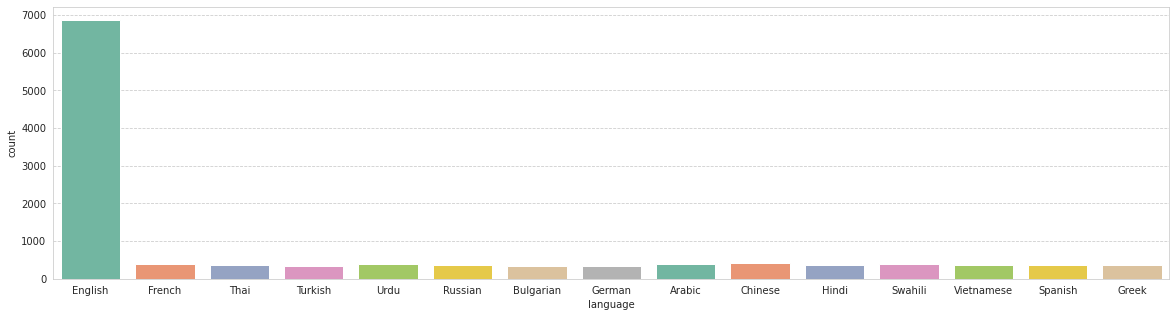

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize=(20,5))
sns.countplot(x="language", data=train_data, palette="Set2")
plt.show()

**Percentage Disribution of all the languages:**

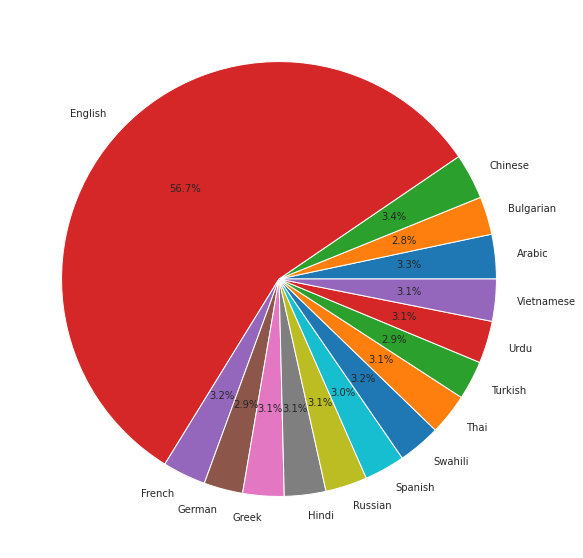

In [ ]:
labels, frequencies = np.unique(value, return_counts = True)
plt.figure(figsize = (20,10))
plt.pie(frequencies,labels = labels, autopct = '%2.1f%%')
plt.show()

OBSERVATIONS:
1. From the above two distributions we can see that English is the most dominating language in the given dataset which is consisting of 56.7%.
2. And the rest of the languages are more or less equally distributed.

**Comparing the Languages Distribution in both Train and Test data:**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

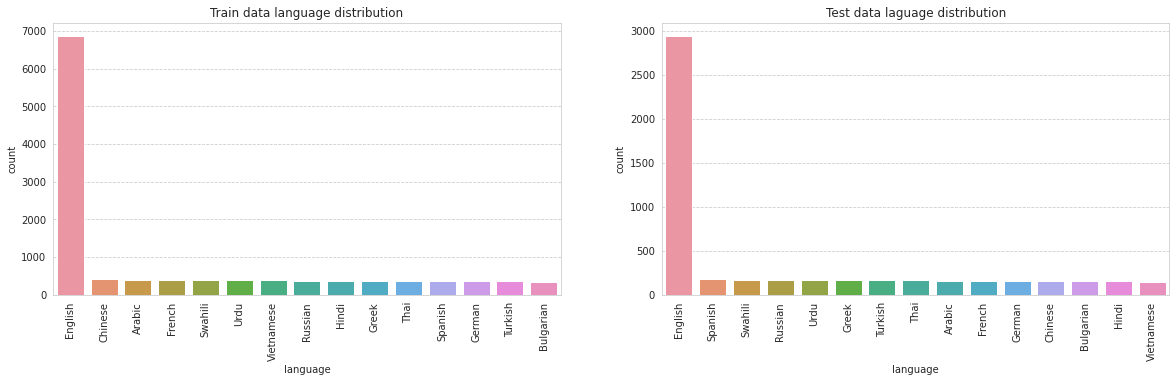

In [ ]:
fig = plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title('Train data language distribution')
sns.countplot(data = train_data, x = 'language', order = v.index)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Test data laguage distribution')
sns.countplot(data = test_data, x = 'language', order = test_data['language'].value_counts().index)
plt.xticks(rotation=90)

OBSERVATIONS:

From the above plots we can see that the language distribution in both train and test data are equal.

**Visualization of the Labels in the Data:**
* Here the target Variable is the "Label" attribute.

In [ ]:
value_label = train_data.label.values
value_label

array([0, 2, 0, ..., 2, 2, 0])

In [ ]:
train_data.label.value_counts()

0    4176
2    4064
1    3880
Name: label, dtype: int64

In [ ]:
v_label = pd.DataFrame()
v_label['Type'] = train_data.label.value_counts().index
v_label['Count'] = train_data.label.value_counts().values
v_label['Type']=v_label['Type'].replace(0,'Entailment')
v_label['Type']=v_label['Type'].replace(1,'Neutral')
v_label['Type']=v_label['Type'].replace(2,'Contradiction')
v_label

,Type,Count
0,Entailment,4176
1,Contradiction,4064
2,Neutral,3880


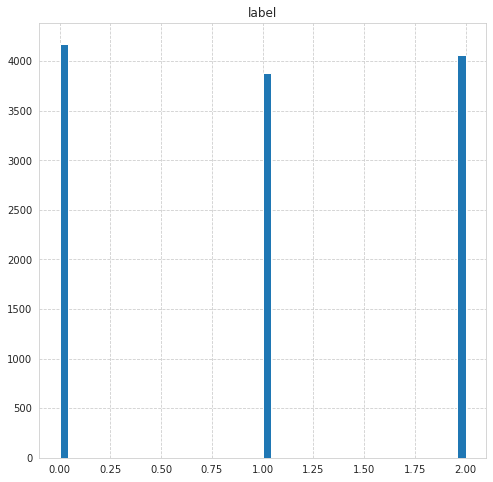

In [ ]:
train_data.hist(bins=50, figsize=(8,8))
plt.show()

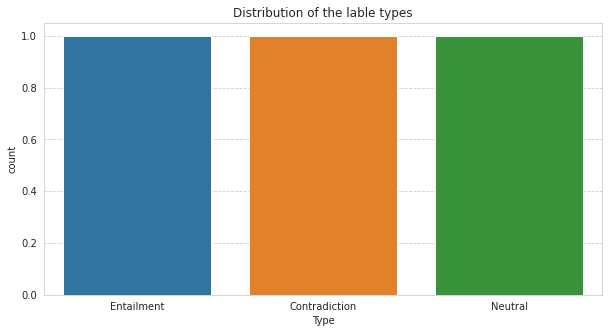

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize=(10,5))
sns.countplot(x="Type", data=v_label)
plt.title("Distribution of the lable types")
plt.show()

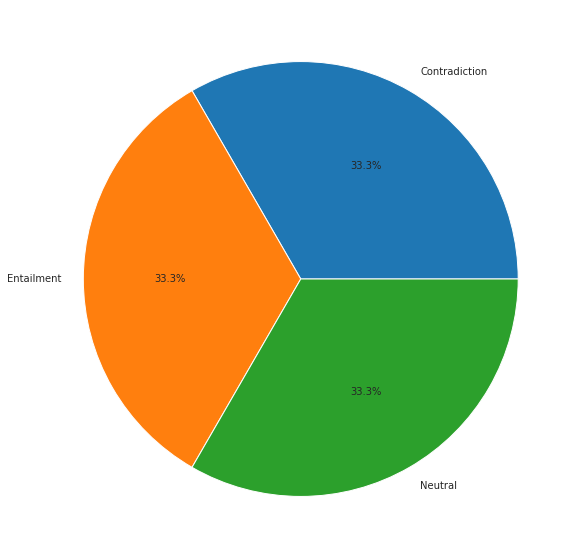

In [ ]:
labels, frequencies = np.unique(v_label['Type'], return_counts = True)
plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%2.1f%%')
plt.show()

OBSERVATIONS:

There are total of 12120 instances of the data, which contains 6 attributes/features

There are total of 4176 records of Entailment
There are total of 4064 records of Contradiction
There are total of 3880 records of Neutral.

Therefore, we can say that there is No Class Imblanace for the given data.

**Let's take a look at two of the Pairs of sentences from Premise and Hypothesis:**


In [ ]:
train_data['premise'].values[0]

'and these comments were considered in formulating the interim rules.'

In [ ]:
train_data['hypothesis'].values[0]

'The rules developed in the interim were put together with these comments in mind.'

In [ ]:
train_data['label'].values[0]

0

OBSERVATION:

We know that this is true based on the information in the premise.
The above premise and hypothesis are entailing each other and the label shows that. 
So, this pair is related by entailment.

In [ ]:
train_data['premise'].values[1]

'These are issues that we wrestle with in practice groups of law firms, she said. '

In [ ]:
train_data['hypothesis'].values[1]

'Practice groups are not permitted to work on these issues.'

In [ ]:
train_data['label'].values[1]

2

OBSERVATION:

We know that this is false based on the information in the premise.
The above premise and hypothesis are contradicting each other and the label shows that. 
So, this pair is related by contradiction and the label shows that.

**Data Preparation:**

Reference: [https://pypi.org/project/googletrans/]

* Googletrans is a free and unlimited python library that implemented Google Translate API. This uses the Google Translate Ajax API to make calls to such methods as detect and translate.

Features which we will be using for our project:

1. Fast and reliable - it uses the same servers that translate.google.com uses

2. Auto language detection

3. Bulk translations

4. Since, we are having 15 different types of languages, we will use the GoogleTranslator to translate the non-english langugaes into english language. 

5. We will create seperate new Translated csv file for both the test and train data and run the below code only once.

In [ ]:
#def translate_data(df):
   # translator = Translator()
    #columns_to_translate = ['premise', 'hypothesis',]
   # for column in columns_to_translate:
     #   try:
          #  translated = translator.translate(df[column], dest='en')
      #  except Exception as e:
          #  print(str(e))
          #  continue
      #  df["translated_"+column] = translated.text
   # return df

In [ ]:
def Translation(df):
    translator = Translator()
    return translator.translate(df).text

In [ ]:
#test_data.premise[test_data.lang_abv!= 'en']=test_data.premise[test_data.lang_abv!= 'en'].apply(lambda x: Translation(x))
#test_data.hypothesis[test_data.lang_abv!= 'en']=test_data.hypothesis[test_data.lang_abv!= 'en'].apply(lambda x: Translation(x))
#train_data.premise[train_data.lang_abv!= 'en']=train_data.premise[train_data.lang_abv!= 'en'].apply(lambda x: Translation(x))
#train_data.hypothesis[train_data.lang_abv!= 'en']=train_data.hypothesis[train_data.lang_abv!= 'en'].apply(lambda x: Translation(x))

In [ ]:
#test_data.to_csv(r'translated_test.csv', index = False)
#train_data.to_csv(r'translated_train.csv', index = False)

**Enabling and testing the TPU:**

Reference : [https://colab.research.google.com/notebooks/tpu.ipynb#scrollTo=FpvUOuC3j27n]

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy() 


INFO:tensorflow:Initializing the TPU system: grpc://10.60.200.162:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.60.200.162:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


**Modelling:**

**XLM-RoBERTa:**

1. XLM means Cross-lingual Language Model. XLM-RoBERTa (XLM-R) is a pre-trained multilingual model that outperforms multiligual BERT. One reason for this is that XLM-R was trained using a lot more data. XLM-R was also trained on 100 languages.

2. Several versions of xlm roberta are available in the Transformers library. Here are two:

  * xlm-roberta-base

  * xlm-roberta-large

3. XLM-RoBERTa uses a SentencePiece-based tokenizer but BERT does not.

This is the link to the XLM-RoBERTa paper:
https://arxiv.org/pdf/1911.02116.pdf


Reference: [https://www.kaggle.com/vbookshelf/basics-of-bert-and-xlm-roberta-pytorch]

  * XLM-RoBERTa Model: (BASE)



Parameters:

In [ ]:
#L_RATE = 1e-5
 
#Epochs_Num = 3
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE
step = len(train_data) // BATCH_SIZE

Build the Model:

In [ ]:
def model_defination(strategy,transformer):
    with strategy.scope():
        transformer_encoder = TFAutoModel.from_pretrained(transformer)
        input_layer = Input(shape=(30,), dtype=tf.int32, name="input_layer")
        sequence_output = transformer_encoder(input_layer)[0]
        cls_token = sequence_output[:, 0, :]
        output_layer = Dense(3, activation='softmax')(cls_token)
        model = Model(inputs=input_layer, outputs=output_layer)
        model.compile(
            Adam(lr=1e-5), 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy']
        )
        return model

In [ ]:
model=model_defination(strategy,"jplu/tf-xlm-roberta-base")

- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 30)]              0         
_________________________________________________________________
tf_roberta_model_5 (TFRobert ((None, 30, 768), (None,  278043648 
_________________________________________________________________
tf_op_layer_strided_slice_1  [(None, 768)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2307      
Total params: 278,045,955
Trainable params: 278,045,955
Non-trainable params: 0
_________________________________________________________________


Tokenizing: With (xlm-roberta-base)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('jplu/tf-xlm-roberta-base')

In [ ]:
train_set = train_data[['premise','hypothesis']].values.tolist()
test_set = test_data[['premise','hypothesis']].values.tolist()

Encoding the Data:

In [ ]:
encoded_train = tokenizer.batch_encode_plus(train_set, pad_to_max_length=True, max_length=30)
encoded_test = tokenizer.batch_encode_plus(test_set, pad_to_max_length=True, max_length=30)

Train and Test Split:

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(encoded_train['input_ids'], train_data.label.values, test_size=0.3)

x_test = encoded_test['input_ids']

In [ ]:
train_df = (tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))

valid_df = (tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(BATCH_SIZE).cache().prefetch(AUTO))

test_df = (tf.data.Dataset.from_tensor_slices(x_test).batch(BATCH_SIZE))

Training the Model:

In [ ]:
model.fit(train_df,steps_per_epoch=step,validation_data=valid_df,epochs=10)

Epoch 1/10
 2/94 [..............................] - ETA: 12s - loss: 0.8751 - accuracy: 0.5664WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0093s vs `on_train_batch_end` time: 0.1308s). Check your callbacks.


94/94 [==============================] - ETA: 0s - loss: 0.8247 - accuracy: 0.6228WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0040s vs `on_test_batch_end` time: 0.0245s). Check your callbacks.


94/94 [==============================] - 16s 170ms/step - loss: 0.8247 - accuracy: 0.6228 - val_loss: 0.9213 - val_accuracy: 0.5924
Epoch 2/10
94/94 [==============================] - 15s 161ms/step - loss: 0.7521 - accuracy: 0.6656 - val_loss: 0.9176 - val_accuracy: 0.5971
Epoch 3/10
94/94 [==============================] - 15s 160ms/step - loss: 0.6822 - accuracy: 0.6990 - val_loss: 0.9833 - val_accuracy: 0.5952
Epoch 4/10
94/94 [==============================] - 15s 157ms/step - loss: 0.6008 - accuracy: 0.7446 - val_loss: 1.1463 - val_accuracy: 0.5657
Epoch 5/10
94/94 [==============================] - 15s 160ms/step - loss: 0.5373 - accuracy: 0.7678 - val_loss: 1.3059 - val_accuracy: 0.5734
Epoch 6/10
94/94 [==============================] - 15s 160ms/step - loss: 0.4459 - accuracy: 0.8138 - val_loss: 1.4513 - val_accuracy: 0.5685
Epoch 7/10
94/94 [==============================] - 15s 162ms/step - loss: 0.3924 - accuracy: 0.8325 - val_loss: 1.6385 - val_accuracy: 0.5641
Epoch 8/10